<a href="https://colab.research.google.com/github/pbhuch/GL_DecA_G4_NLP1/blob/NLP1_PM/GL_DecA_G4_NLP1_Nov27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Great Learning : AIML Online Capstone -AUTOMATIC TICKET ASSIGNMENT

DecA : Group 4: NLP 1

Group Members :
1. Priya Moily
2. Priyanka Gupta
3. Avinash Balani
4. Priyank Bhuch


Importing relavant Libraries

In [332]:
!pip install nlpaug

In [333]:

!pip install ftfy
from time import time
from PIL import Image
from zipfile import ZipFile
import os, sys, itertools, re
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
import sklearn.neighbors._base

import imblearn
from imblearn.over_sampling import SMOTE

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D, Reshape, Embedding, LSTM,  TimeDistributed, Bidirectional, Lambda, Input, Add, GlobalMaxPool1D
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
#import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# to define loss
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

from itertools import islice

import re
import nltk
from nltk.corpus import stopwords

from ftfy import fix_encoding, fix_text, badness
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.utils import resample

import pickle, string

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import spacy

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

SEED = 123                 # to be able to rerun the same NN
np.random.seed(SEED)
tf.random.set_seed(SEED)

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

! pip install langdetect
from langdetect import detect
from langdetect import detect
!pip install goslate
from goslate import Goslate
!pip install spacy
from collections import defaultdict
from bs4 import BeautifulSoup
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [256]:
# Load the dataset into a Pandas dataframe called "dataset" and check the head of the dataset
dataset = pd.read_csv('/content/sample_data/input_data.csv')

In [257]:
dataset.shape

(8500, 4)

In [258]:
dataset.describe()

,Short description,Description,Caller,Assignment group
count,8498,8499,8500,8500
unique,7482,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [259]:
# Find out the null value counts in each column
dataset.isnull().sum()

Short description    2
Description          1
Caller               0
Assignment group     0
dtype: int64

In [260]:
dataset[pd.isnull(dataset).any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [261]:
# NULL replacement
dataset.fillna(str(), inplace=True)
dataset.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [262]:
dataset[pd.isnull(dataset).any(axis=1)]

,Short description,Description,Caller,Assignment group


In [263]:
duplicate = dataset[dataset.duplicated()]

In [264]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 51 to 8405
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  83 non-null     object
 1   Description        83 non-null     object
 2   Caller             83 non-null     object
 3   Assignment group   83 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


In [265]:
dataset1 = dataset[~dataset.duplicated()]

In [266]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8417 non-null   object
 1   Description        8417 non-null   object
 2   Caller             8417 non-null   object
 3   Assignment group   8417 non-null   object
dtypes: object(4)
memory usage: 328.8+ KB


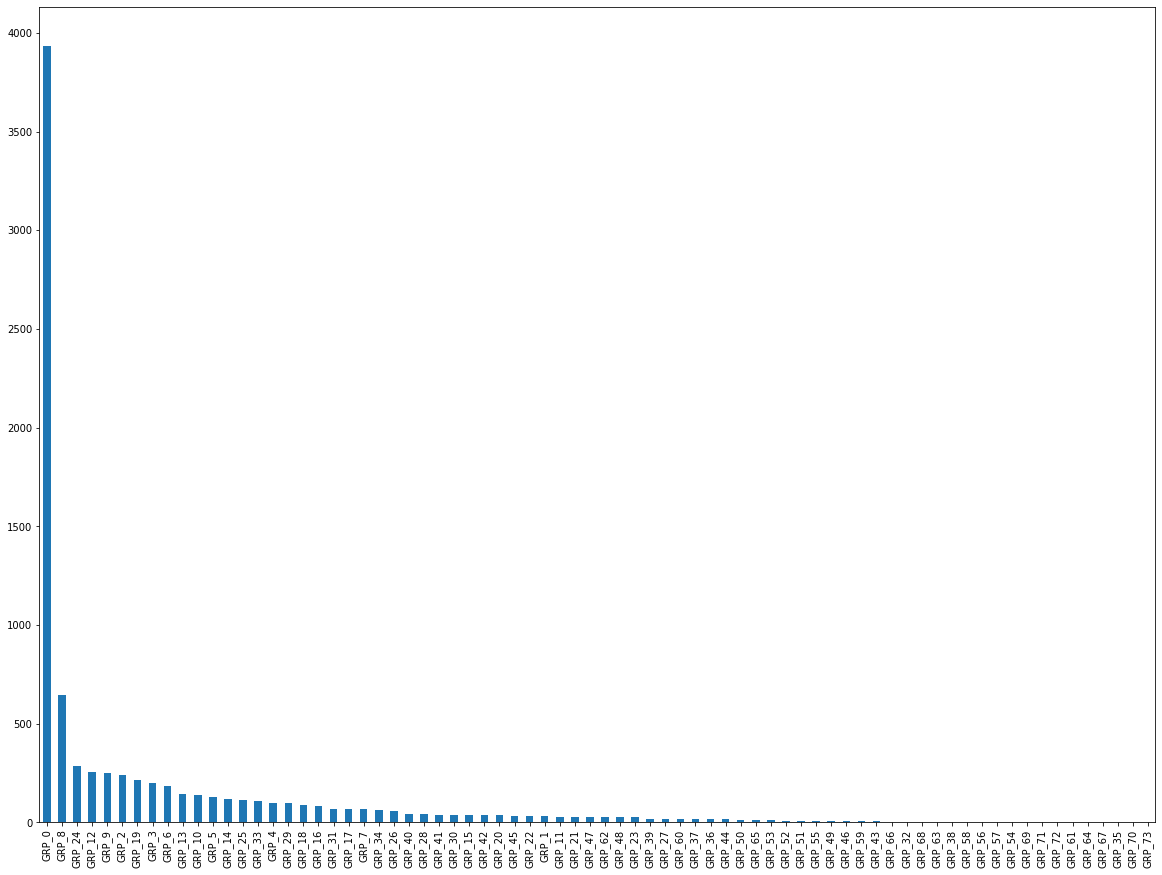

In [267]:
plt.figure(figsize=(20,15))
dataset1['Assignment group'].value_counts().plot(kind='bar')

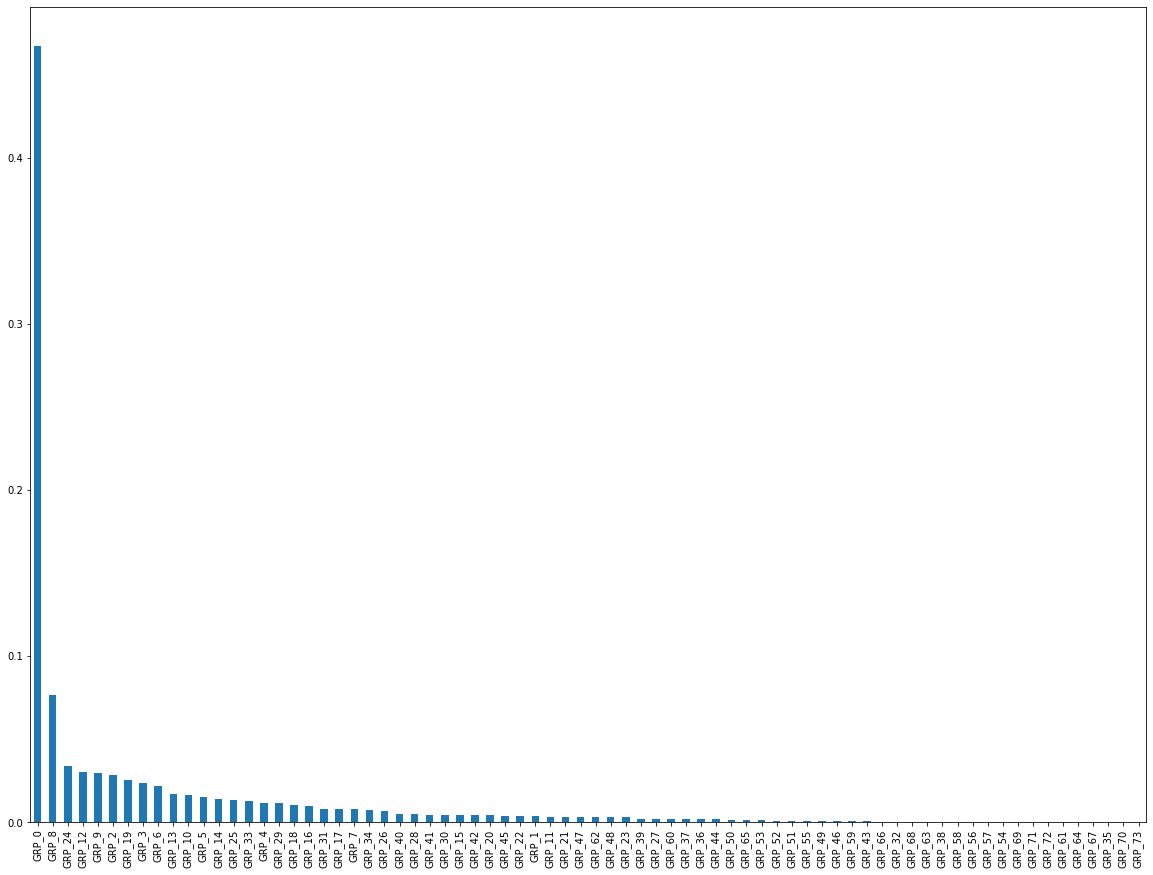

In [268]:
plt.figure(figsize=(20,15))
dataset1['Assignment group'].value_counts(normalize=True).plot(kind='bar')

In [269]:
display(dataset1['Assignment group'].value_counts(normalize=True))

GRP_0     0.467387
GRP_8     0.076631
GRP_24    0.033860
GRP_12    0.030533
GRP_9     0.029939
GRP_2     0.028633
GRP_19    0.025544
GRP_3     0.023761
GRP_6     0.021742
GRP_13    0.017227
GRP_10    0.016633
GRP_5     0.015207
GRP_14    0.014019
GRP_25    0.013782
GRP_33    0.012712
GRP_4     0.011881
GRP_29    0.011524
GRP_18    0.010455
GRP_16    0.010099
GRP_31    0.008198
GRP_17    0.008079
GRP_7     0.008079
GRP_34    0.007366
GRP_26    0.006653
GRP_40    0.005346
GRP_28    0.005228
GRP_41    0.004752
GRP_30    0.004633
GRP_15    0.004515
GRP_42    0.004396
GRP_20    0.004277
GRP_45    0.004158
GRP_22    0.003683
GRP_1     0.003683
GRP_11    0.003564
GRP_21    0.003327
GRP_47    0.003208
GRP_62    0.002970
GRP_48    0.002970
GRP_23    0.002970
GRP_39    0.002257
GRP_27    0.002139
GRP_60    0.001901
GRP_37    0.001901
GRP_36    0.001782
GRP_44    0.001782
GRP_50    0.001663
GRP_65    0.001307
GRP_53    0.001307
GRP_52    0.001069
GRP_51    0.000950
GRP_55    0.000950
GRP_49    0.

In [270]:
# Top 5 callers in each assignment group
top_n = 5
df_sample2 = dataset1['Caller'].groupby(dataset1['Assignment group']).value_counts()
caller_grp = pd.DataFrame(df_sample2.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
caller_grp.head(15)

Caller
Assignment group Caller                   
GRP_0            fumkcsji sarmtlhy     126
                 rbozivdq gmlhrtvp      71
                 olckhmvx pcqobjnd      47
                 efbwiadp dicafxhv      45
                 mfeyouli ndobtzpw      13
GRP_1            bpctwhsn kzqsbmtp       6
                 jloygrwh acvztedi       4
                 jyoqwxhz clhxsoqy       3
                 spxqmiry zpwgoqju       3
                 kbnfxpsy gehxzayq       2
GRP_10           bpctwhsn kzqsbmtp      60
                 ihfkwzjd erbxoyqk       6
                 dizquolf hlykecxa       5
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3

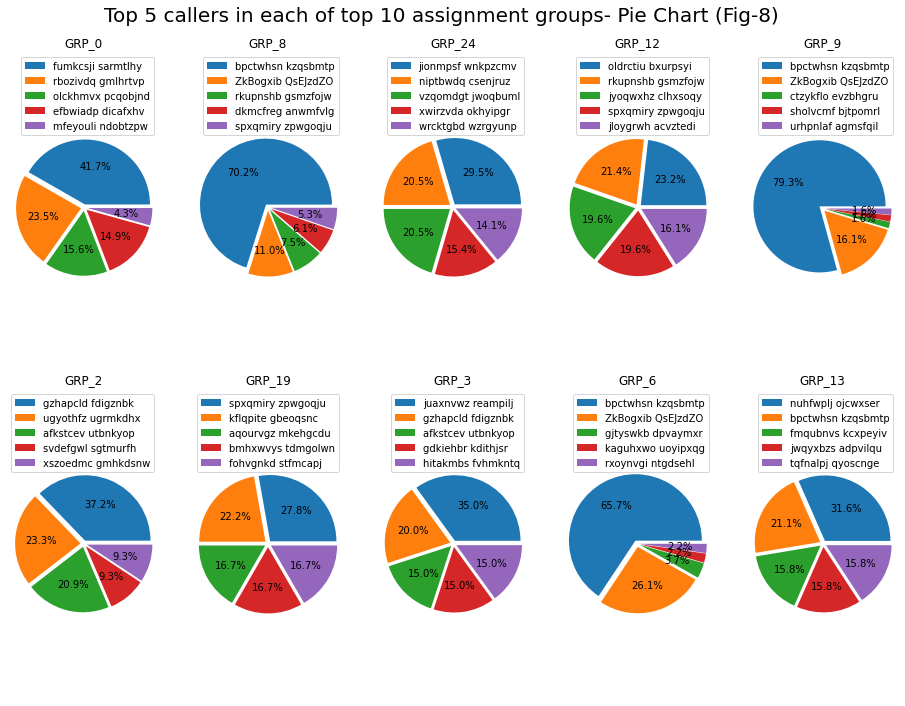

In [271]:
# Visualize Top 5 callers in each of top 10 assignment groups
top_n = 10
df_sample3 = pd.DataFrame(dataset1.groupby('Assignment group').size(),columns = ['Count']).reset_index()
top_grps = df_sample3.nlargest(top_n, 'Count')['Assignment group'].tolist()

fig_cols = 5
fig_rows = int(np.ceil(top_n/fig_cols))
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(13,9.5))
fig.suptitle('Top 5 callers in each of top 10 assignment groups- Pie Chart (Fig-8)', y=1, va= 'bottom', size='20')
for row in range(fig_rows):
    for col in range(fig_cols):
        grp_n = fig_cols * row + col
        if grp_n < top_n:
            xs = caller_grp.xs(top_grps[grp_n])
            _ = axes[row,col].pie(xs, autopct='%1.1f%%', explode=[0.05]*5)
            axes[row,col].legend(labels=xs.index,loc="best")
            axes[row,col].axis('equal')
            axes[row,col].set_title(top_grps[grp_n])

plt.tight_layout()

In [272]:
dataset1.insert(loc=4, 
              column='combined_description', 
              allow_duplicates=True, 
              value=list(dataset1['Short description'].str.strip() + ' ' + dataset1['Description'].str.strip()))

In [273]:
def fn_decode_to_ascii(df):
  text = df.encode().decode('utf-8').encode('ascii', 'ignore')
  return text.decode("utf-8") 

dataset1['combined_description'] = dataset1['combined_description'].apply(fn_decode_to_ascii)

In [274]:
dataset1.head()

,Short description,Description,Caller,Assignment group,combined_description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook received from: hmjdrvpb.komuaywn@gmail...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from: eylqgodm.ybq...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


In [275]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     8417 non-null   object
 1   Description           8417 non-null   object
 2   Caller                8417 non-null   object
 3   Assignment group      8417 non-null   object
 4   combined_description  8417 non-null   object
dtypes: object(5)
memory usage: 652.6+ KB


In [276]:
dataset1.to_csv("dataset_combined.csv")

In [277]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     8417 non-null   object
 1   Description           8417 non-null   object
 2   Caller                8417 non-null   object
 3   Assignment group      8417 non-null   object
 4   combined_description  8417 non-null   object
dtypes: object(5)
memory usage: 652.6+ KB


In [278]:
dataset1 = dataset1.reset_index()

In [279]:
dataset1 = dataset1.drop(columns=['index'],axis=1)

In [280]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     8417 non-null   object
 1   Description           8417 non-null   object
 2   Caller                8417 non-null   object
 3   Assignment group      8417 non-null   object
 4   combined_description  8417 non-null   object
dtypes: object(5)
memory usage: 328.9+ KB


In [281]:
#dataset1 = pd.read_csv('/content/sample_data/dataset_combined.csv')

In [282]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     8417 non-null   object
 1   Description           8417 non-null   object
 2   Caller                8417 non-null   object
 3   Assignment group      8417 non-null   object
 4   combined_description  8417 non-null   object
dtypes: object(5)
memory usage: 328.9+ KB


In [283]:
dataset1.fillna(str(), inplace=True)
dataset1.isnull().sum()

Short description       0
Description             0
Caller                  0
Assignment group        0
combined_description    0
dtype: int64

In [35]:
#dataset1.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [284]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     8417 non-null   object
 1   Description           8417 non-null   object
 2   Caller                8417 non-null   object
 3   Assignment group      8417 non-null   object
 4   combined_description  8417 non-null   object
dtypes: object(5)
memory usage: 328.9+ KB


In [285]:
# Write a function to apply to the dataset to detect Mojibakes
def is_mojibake_impacted(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not CP-1252 encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False
    
# Check the dataset for mojibake impact
dataset1[~dataset1.iloc[:,:].applymap(is_mojibake_impacted).all(1)]

,Short description,Description,Caller,Assignment group,combined_description


In [286]:
dataset1.tail()

,Short description,Description,Caller,Assignment group,combined_description
8412,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail received fro...
8413,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue telephony_software issue
8414,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2: windows password reset for tifpdchb pedx...
8415,machine não está funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,machine no est funcionando i am unable to acce...
8416,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,an mehreren pc`s lassen sich verschiedene prgr...


In [287]:
# Take an example of row# 8471 combined_description and fix it
print('Garbled text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (dataset1['combined_description'][8189], 
                                                                        fix_text(dataset1['combined_description'][8189])))

# List all mojibakes defined in ftfy library
#print('\nMojibake Symbol RegEx:\n', badness.MOJIBAKE_SYMBOL_RE.pattern)

Garbled text: outlook outlook
Fixed text: outlook outlook


In [288]:
dataset1['Short description']=dataset1['Short description'].apply(fix_text)
dataset1['Description']=dataset1['Description'].apply(fix_text)
dataset1['combined_description']=dataset1['combined_description'].apply(fix_text)

In [289]:
# Visualize row#8416
dataset1.loc[8416,:]

Short description       an mehreren pc`s lassen sich verschiedene prgr...
Description             an mehreren pc`s lassen sich verschiedene prgr...
Caller                                                  kqvbrspl jyzoklfx
Assignment group                                                   GRP_49
combined_description    an mehreren pc`s lassen sich verschiedene prgr...
Name: 8416, dtype: object

In [290]:
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'

In [291]:
dataset1['Language'] = dataset1['combined_description'].apply(fn_lan_detect)

In [292]:
dataset1.head()

,Short description,Description,Caller,Assignment group,combined_description,Language
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,en
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook received from: hmjdrvpb.komuaywn@gmail...,en
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from: eylqgodm.ybq...,en
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,no


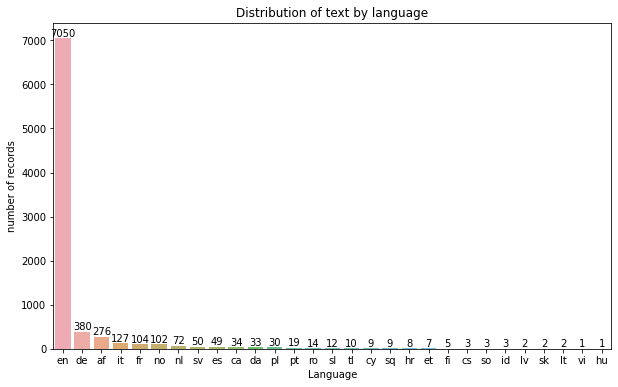

In [293]:
x = dataset1["Language"].value_counts()
x=x.sort_values(ascending=False)
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

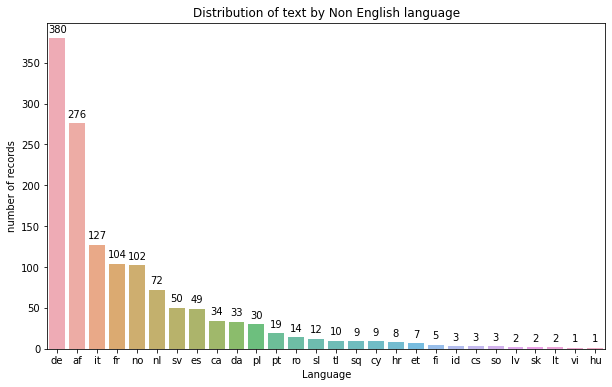

In [294]:
dataset1_nonEnglish = pd.DataFrame(dataset1[dataset1["Language"]!='en'])

x = dataset1_nonEnglish["Language"].value_counts()
x=x.sort_values(ascending=False)
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by Non English language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [295]:
dataset1['Language'].value_counts()

en    7050
de     380
af     276
it     127
fr     104
no     102
nl      72
sv      50
es      49
ca      34
da      33
pl      30
pt      19
ro      14
sl      12
tl      10
cy       9
sq       9
hr       8
et       7
fi       5
cs       3
so       3
id       3
lv       2
sk       2
lt       2
vi       1
hu       1
Name: Language, dtype: int64

In [296]:
dataset1.reset_index(inplace=True)

In [297]:
dataset1.to_csv('dataset_mojibake_treated_LanguageDetected.csv', index=False, encoding='utf_8_sig')

In [ ]:
#text = text.translate(str.maketrans("","", string.punctuation))
    #text = re.sub(r'\s+', ' ', text)


In [298]:
email_regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

In [299]:
def fn_remove_irrelaventWords(df,columnName):
  for index in range(df.shape[0]):
    df[columnName][index] = df[columnName][index].lower()                                       # to lower case 
    df[columnName][index] = re.sub(email_regex,"",df.loc[index,columnName])                     # remove email address
    df[columnName][index] = re.sub(r'\S*@\S*\s?', '', df.loc[index,columnName])                 # remove email address with appended text
    df[columnName][index] = re.sub(r"received from:",' ',df.loc[index,columnName])              # remove unwanted text
    df[columnName][index] = re.sub(r"from:",' ',df.loc[index,columnName])                       # remove unwanted text
    df[columnName][index] = re.sub(r"to:",' ',df.loc[index,columnName])                         # remove unwanted text
    df[columnName][index] = re.sub(r"subject:",' ',df.loc[index,columnName])                    # remove unwanted text  
    df[columnName][index] = re.sub(r"sent:",' ',df.loc[index,columnName])                       # remove unwanted text
    df[columnName][index] = re.sub(r"ic:",' ',df.loc[index,columnName])                         # remove unwanted text
    df[columnName][index] = re.sub(r"cc:",' ',df.loc[index,columnName])                         # remove unwanted text
    df[columnName][index] = re.sub(r"bcc:",' ',df.loc[index,columnName])                        # remove unwanted text  
    df[columnName][index] = re.sub(r'\d+','' ,df.loc[index,columnName])                         # remove numbers
    df[columnName][index] = re.sub(r'\n',' ',df.loc[index,columnName])                          # remove new line character
    df[columnName][index] = re.sub(r'#','', df.loc[index,columnName])                           # remove hashtag while keeping hashtag text
    df[columnName][index] = re.sub(r'&;?', 'and',df.loc[index,columnName])                      # remove &
    df[columnName][index] = re.sub(r'\&\w*;', '', df.loc[index,columnName])                     # remove HTML special entities (e.g. &amp;)
    df[columnName][index] = re.sub(r'https?:\/\/.*\/\w*', '', df.loc[index,columnName])         # remove hyperlinks
    df[columnName][index] = re.sub(r"hello",' ',df.loc[index,columnName])                       # remove 'hello' word
    df[columnName][index] = re.sub(r"_",' ',df.loc[index,columnName])                           # remove _
    df[columnName][index] = re.sub(r"-",' ',df.loc[index,columnName])                           # remove -
    df[columnName][index] = re.sub(r",",' ',df.loc[index,columnName])                           # remove ,
    df[columnName][index] = re.sub(r"\(",' ',df.loc[index,columnName])                          # remove (
    df[columnName][index] = re.sub(r"\)",' ',df.loc[index,columnName])                          # remove )
  return df

In [300]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 8417 non-null   int64 
 1   Short description     8417 non-null   object
 2   Description           8417 non-null   object
 3   Caller                8417 non-null   object
 4   Assignment group      8417 non-null   object
 5   combined_description  8417 non-null   object
 6   Language              8417 non-null   object
dtypes: int64(1), object(6)
memory usage: 460.4+ KB


In [301]:
df_clean = fn_remove_irrelaventWords(dataset1,'combined_description')

In [302]:
df_clean.head(20)

,index,Short description,Description,Caller,Assignment group,combined_description,Language
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue verified user details. employee a...,en
1,1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook team my meetings/skype meeting...,en
2,2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn hi i cannot log on to ...,en
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page unable to access...,en
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,no
5,5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...,en
6,6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,event: critical:hostname .company.com the valu...,en
7,7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,ticket no employment status new non employe...,en
8,8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook unable to...,en
9,9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,ticket update on inplant ticket update on inp...,en


In [303]:
dataset1.head(10)

,index,Short description,Description,Caller,Assignment group,combined_description,Language
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue verified user details. employee a...,en
1,1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook team my meetings/skype meeting...,en
2,2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn hi i cannot log on to ...,en
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page unable to access...,en
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,no
5,5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...,en
6,6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,event: critical:hostname .company.com the valu...,en
7,7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,ticket no employment status new non employe...,en
8,8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook unable to...,en
9,9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,ticket update on inplant ticket update on inp...,en


In [304]:
df_clean.to_csv("dataset_clean_combined_description")

In [305]:
df_clean.insert(loc=7,column='ConvertedToEnglish',value = np.nan, allow_duplicates = True)

In [306]:
df_clean.head()

,index,Short description,Description,Caller,Assignment group,combined_description,Language,ConvertedToEnglish
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue verified user details. employee a...,en,NaN
1,1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook team my meetings/skype meeting...,en,NaN
2,2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn hi i cannot log on to ...,en,NaN
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page unable to access...,en,NaN
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,NaN


In [307]:
svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
svc_urls = ['http://translate.google' + domain for domain in svc_domains]

In [308]:
gs = Goslate(service_urls=svc_urls)

In [309]:
trans_8416 = gs.translate(df_clean['combined_description'][8416], target_language='en', source_language='auto')

In [310]:
print ('Original Text : ',df_clean['combined_description'][8416])
print('Traslated to English : ',trans_8416)

Original Text :  an mehreren pc`s lassen sich verschiedene prgramdntyme nicht ffnen. an mehreren pc`s lassen sich verschiedene prgramdntyme nicht ffnen. bereich cnc.
Traslated to English :  Several prgramdntyme can not be folded on several PCs. Several prgramdntyme can not be folded on several PCs. Area CNC.


In [311]:
def fn_ConvertToEnglish(df,columnName):
  for idx in range(df.shape[0]):
    row_iter = gs.translate(df[columnName][idx],target_language='en',source_language = 'auto')
    df[columnName][idx] = str(row_iter)
  return df

In [324]:
#df_translated = fn_ConvertToEnglish(df_clean,'ConvertedToEnglish')
#df_translated.head()
#df_translated.to_csv('/sample_data/dataset_mojibaked_LangDetect_Translated.csv')

#Importing the translated csv rather than running the code
df_translated = pd.read_csv('/content/sample_data/dataset_mojibaked_LangDetect_Translated.csv',encoding='ISO-8859-1')

In [325]:
df_translated.tail()

,Unnamed: 0,Unnamed: 0.1,Short description,Description,Caller,Assignment group,combined_description_caller,combined_description,Language,ConvertedToEnglish
8412,8412,8412,emails not coming in from zz mail,received from avglmrts.vhqmtiua@gmail.com\n go...,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail received fro...,emails not coming in from zz mail received fro...,en,emails not coming in from zz mail received fro...
8413,8413,8413,telephonysoftware issue,telephonysoftware issue,rbozivdq gmlhrtvp,GRP_0,telephonysoftware issue telephonysoftware issu...,telephonysoftware issue telephonysoftware issue,en,telephonysoftware issue telephonysoftware issue
8414,8414,8414,vip windows password reset for tifpdchb pedxruyf,vip windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,GRP_0,vip windows password reset for tifpdchb pedxru...,vip windows password reset for tifpdchb pedxru...,en,vip windows password reset for tifpdchb pedxru...
8415,8415,8415,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine nÃ£o estÃ¡ funcionando i am unable to ...,en,machine nÃ£o estÃ¡ funcionando i am unable to ...
8416,8416,8416,an mehreren pcs lassen sich verschiedene prgra...,an mehreren pcs lassen sich verschiedene prgra...,kqvbrspl jyzoklfx,GRP_49,an mehreren pcs lassen sich verschiedene prgra...,an mehreren pcs lassen sich verschiedene prgra...,de,Several PCs can not open various prgramdntyms ...


In [326]:
df_translated = df_translated.drop(columns=['Unnamed: 0','Unnamed: 0.1','Short description','Description','combined_description_caller'],axis=1)

In [327]:
df_translated.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish
0,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,en,login issue verified user detailsemployee mana...
1,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings...,en,outlook received from hello team my meetingssk...
2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot...,en,cant log in to vpn received from hi i cannot l...
3,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,en,unable to access hrtool page unable to access ...
4,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,Skype Error Skype Error


In [328]:
df_ML = df_translated.copy()
df_DL = df_translated.copy()

In [329]:
print(df_ML.shape)
print(df_DL.shape)

(8417, 5)
(8417, 5)


In [334]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [335]:
stopwords = set(stopwords.words('english'))
 # Remove stopwords
df_ML['ConvertedToEnglish'] = df_ML['ConvertedToEnglish'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [336]:
#lemmatization
# Initialize spacy 'en' medium model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en', disable=['parser', 'ner'])

# Define a function to lemmatize the descriptions
def lemmatizer(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])

In [337]:
print('\033[1mOriginal text:\033[0m')
print(df_ML['ConvertedToEnglish'][50])
print('_'*100)
print('\033[1mLemmatized text:\033[0m')
print(lemmatizer(df_ML['ConvertedToEnglish'][50]))

Original text:
job mmzscrdlymerktc failed jobscheduler received job mmzscrdlymerktc failed jobscheduler
____________________________________________________________________________________________________
Lemmatized text:
job mmzscrdlymerktc fail jobscheduler receive job mmzscrdlymerktc fail jobscheduler


In [338]:
df_ML['ConvertedToEnglish'] = df_ML['ConvertedToEnglish'].apply(lemmatizer)

In [339]:
df_ML.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish
0,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,en,login issue verify user detailsemployee manage...
1,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings...,en,outlook receive hello team meetingsskype meeti...
2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot...,en,can not log vpn receive hi can not log vpn best
3,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,en,unable access hrtool page unable access hrtool...
4,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,Skype Error Skype Error


In [340]:
#df_ML.to_csv("dataset_Cleaned_Translated_StopWords_Lemmatized.csv")
df_ML = pd.read_csv('/content/sample_data/dataset_Cleaned_Translated_StopWords_Lemmatized.csv')

Wordcloud for entire Dataset

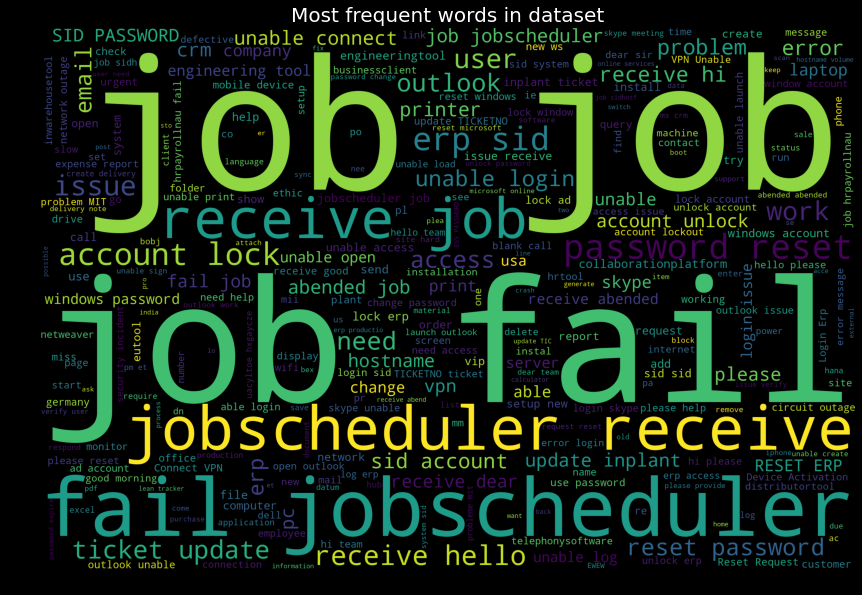

In [341]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black')

# generate word cloud for data
wc_word=wc.generate(str(df_ML.ConvertedToEnglish))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

In [342]:
#ngram function
def ngram_extractor(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to generate a dataframe with n_gram and top max_row frequencies
def generate_ngrams(df, n_gram, max_row):
    temp_dict = defaultdict(int)
    for question in df:
        for word in ngram_extractor(question, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

In [343]:
df_ML.isna().sum()
df_ML.fillna(str(), inplace=True)
df_ML.isnull().sum()
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            8417 non-null   int64 
 1   Caller                8417 non-null   object
 2   Assignment group      8417 non-null   object
 3   combined_description  8417 non-null   object
 4   Language              8417 non-null   object
 5   ConvertedToEnglish    8417 non-null   object
dtypes: int64(1), object(5)
memory usage: 394.7+ KB


In [344]:
df_ML = df_ML.drop(columns=['Unnamed: 0'])

In [345]:
Ticket_desc = df_ML['ConvertedToEnglish']
#Define empty list
ticket_desc_cleaned = []
res = []
#Define for loop to iterate through the elements of the ticket_desc
for l in Ticket_desc:
    #Parse the contents of the cell
    soup = BeautifulSoup(l, 'html.parser')
    #Find all instances of the text within the </p> tag
    for el in soup.find_all('p'):
        res.append(el.get_text())
    #concatenate the strings from the list    
    endstring = ' '.join(map(str, res))
    #reset list
    res = []
    #Append the concatenated string to the main list
    ticket_desc_cleaned.append(endstring)

In [346]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Caller                8417 non-null   object
 1   Assignment group      8417 non-null   object
 2   combined_description  8417 non-null   object
 3   Language              8417 non-null   object
 4   ConvertedToEnglish    8417 non-null   object
dtypes: object(5)
memory usage: 328.9+ KB


In [347]:
ticket_desc_na_cleaned = [item.lower() for item in Ticket_desc]
#remove html links from list 
ticket_desc_na_cleaned =  [re.sub(r"http\S+", "", item) for item in ticket_desc_na_cleaned]
#remove special characters left
ticket_desc_na_cleaned = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", item) for item in ticket_desc_na_cleaned]

#convert to dataframe and rename the column of the ticket_desc_na_cleaned list
ticket_desc_clean = pd.DataFrame(np.array(ticket_desc_na_cleaned).reshape(-1))
ticket_desc_clean.columns = ["ans"]
#Squeeze dataframe to obtain series
desc_cleaned = ticket_desc_clean.squeeze()

In [348]:
#generate unigram
ans_unigram = generate_ngrams(desc_cleaned, 1, 30)

In [349]:
ans_unigram.head()

,word,wordcount
0,job,3000
1,receive,2541
2,please,2298
3,password,2171
4,erp,1974


In [350]:
ans_unigram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   word       30 non-null     object
 1   wordcount  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


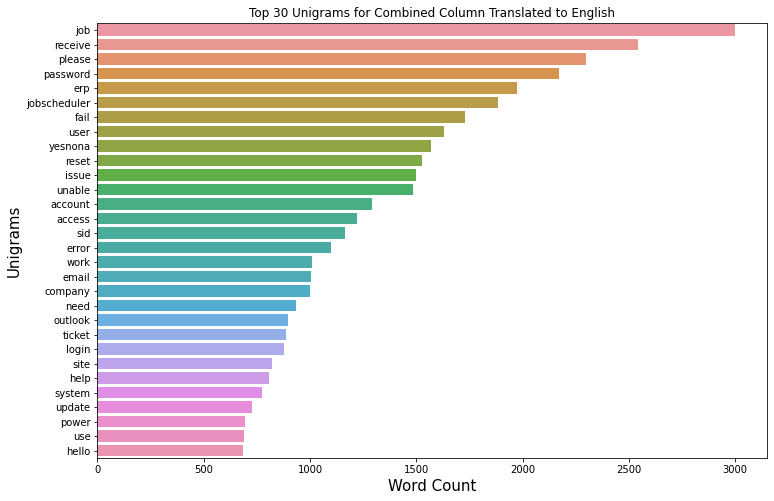

In [351]:
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(ans_unigram["wordcount"],ans_unigram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 30 Unigrams for Combined Column Translated to English")
plt.show()

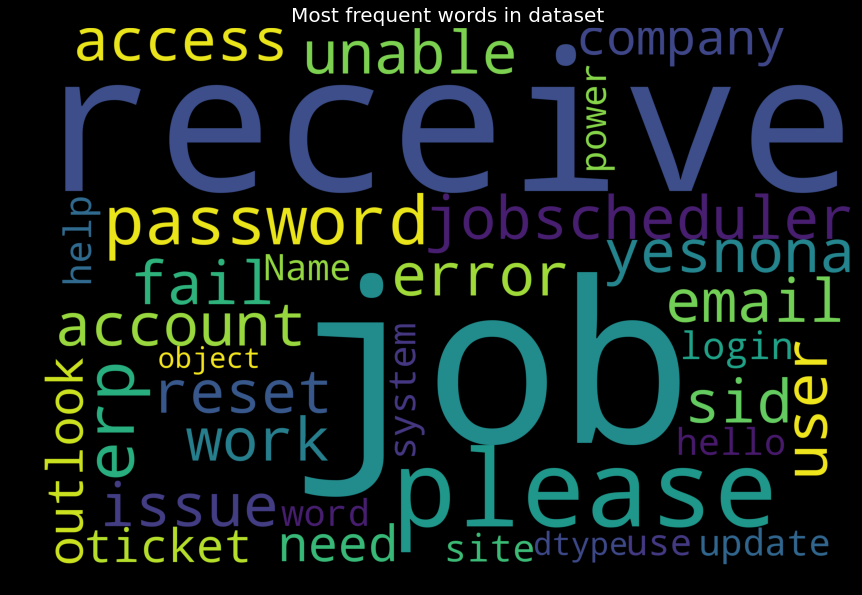

In [352]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black')

# generate word cloud for data
#wc_word=wc.generate(str(ans_unigram))
wc_word=wc.generate(str(ans_unigram['word']))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

In [353]:
#generate bigram
ans_bigram = generate_ngrams(desc_cleaned, 2, 20)

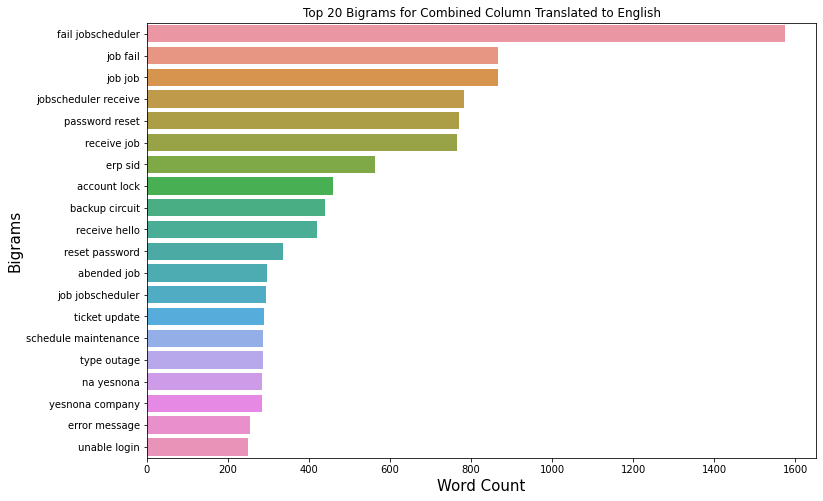

In [354]:
#generate barplot for bigram
plt.figure(figsize=(12,8))
sns.barplot(ans_bigram["wordcount"],ans_bigram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Bigrams", fontsize=15)
plt.title("Top 20 Bigrams for Combined Column Translated to English")
plt.show()

Wordcloud for bigram

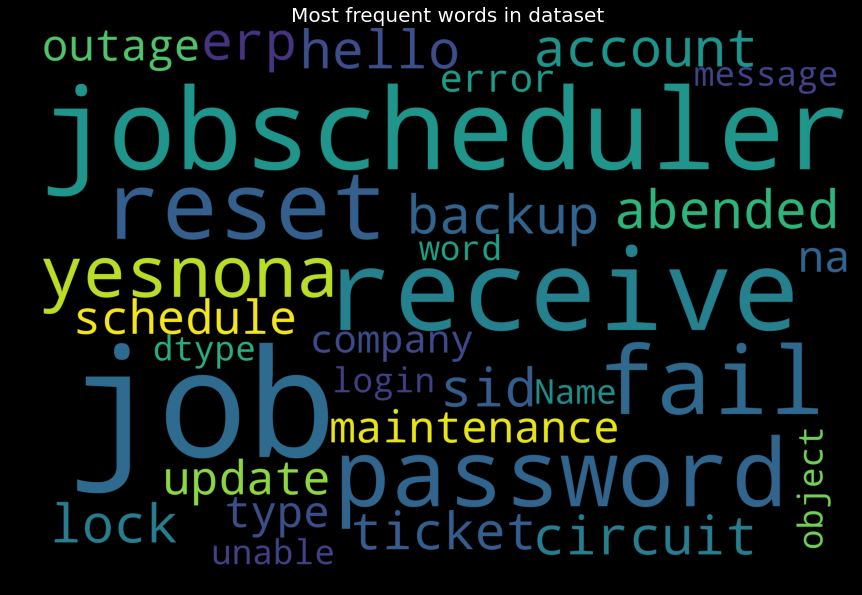

In [355]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black')

# generate word cloud for data
wc_word=wc.generate(str(ans_bigram['word']))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

Generate Trigram

In [356]:
#generate trigram
ans_trigram = generate_ngrams(desc_cleaned, 3, 20)

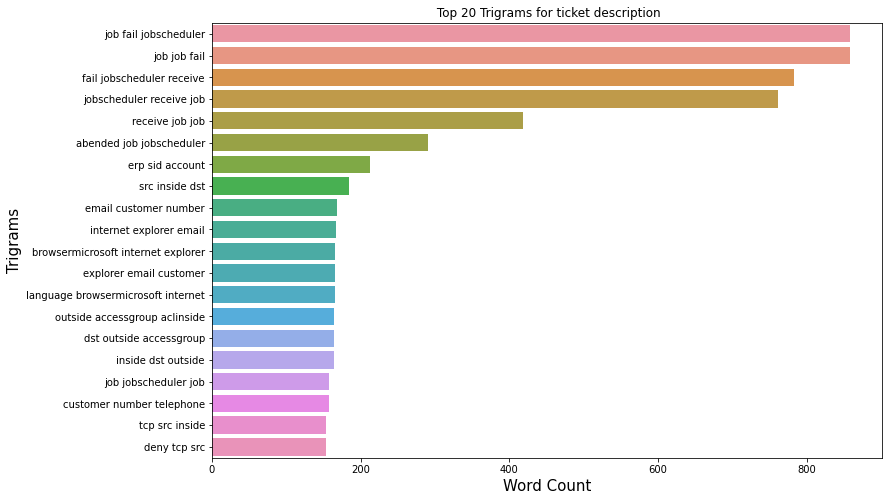

In [357]:
#generate barplot for bigram
plt.figure(figsize=(12,8))
sns.barplot(ans_trigram["wordcount"],ans_trigram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Trigrams", fontsize=15)
plt.title(" Top 20 Trigrams for ticket description")
plt.show()

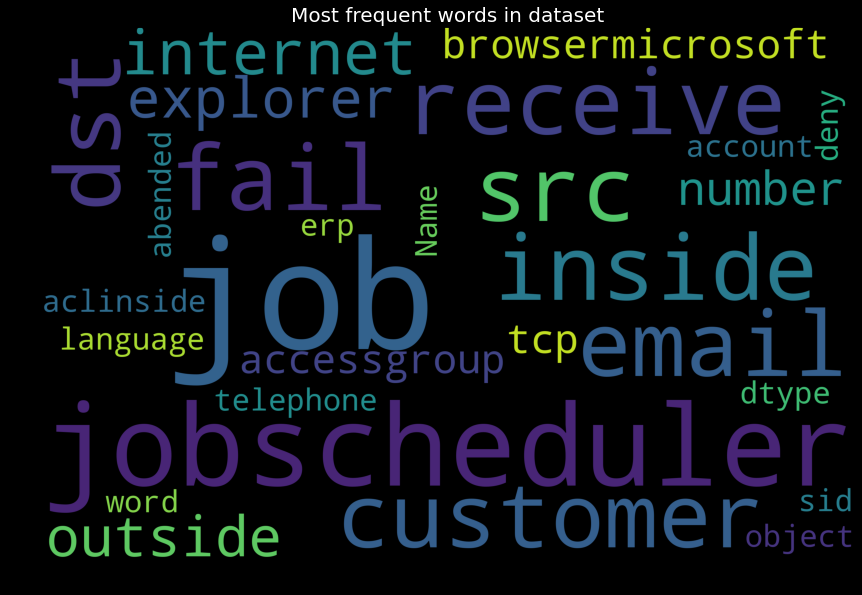

In [358]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black')

# generate word cloud for data
wc_word=wc.generate(str(ans_trigram['word']))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

In [359]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Caller                8417 non-null   object
 1   Assignment group      8417 non-null   object
 2   combined_description  8417 non-null   object
 3   Language              8417 non-null   object
 4   ConvertedToEnglish    8417 non-null   object
dtypes: object(5)
memory usage: 328.9+ KB


In [107]:
!pip install -U pandas-profiling

     |████████████████████████████████| 261 kB 7.3 MB/s 
     |████████████████████████████████| 675 kB 45.7 MB/s 
     |████████████████████████████████| 62 kB 693 kB/s 
     |████████████████████████████████| 10.1 MB 47.8 MB/s 
     |████████████████████████████████| 596 kB 41.0 MB/s 
     |████████████████████████████████| 303 kB 31.5 MB/s 
     |████████████████████████████████| 102 kB 10.1 MB/s 
     |████████████████████████████████| 3.1 MB 68.1 MB/s 
     |████████████████████████████████| 812 kB 49.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=48db1951f84fdf1b6a75d70a1a138c3c138734d5c21635790a827a09ddb56a11
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=d79c9821669c8f8c693180b839fb3d1af07b9930c6ce77b32f1df8396491627f
 

In [360]:
df_ML.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish
0,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,en,login issue verify user detailsemployee manage...
1,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings...,en,outlook receive hello team meetingsskype meeti...
2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot...,en,can not log vpn receive hi can not log vpn best
3,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,en,unable access hrtool page unable access hrtool...
4,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,Skype Error Skype Error


In [361]:
#Convert  Combined text from each sentense to the words. use of simple_process as it tokenize() internally
#https://radimrehurek.com/gensim/utils.html#gensim.utils.simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [362]:
data_words = list(sent_to_words(df_ML.ConvertedToEnglish))

In [363]:
print(len(data_words))

8417


In [364]:
# Build the bigram and trigram models
#https://radimrehurek.com/gensim/models/phrases.html
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [365]:
print(bigram_mod[data_words[1]])

['outlook', 'receive', 'hello', 'team', 'meetingsskype', 'meeting', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


In [366]:
print(trigram_mod[data_words[1]])

['outlook', 'receive', 'hello', 'team', 'meetingsskype', 'meeting', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


In [367]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [368]:
# Form Bigrams
data_words_trigrams = make_trigrams(data_words)

In [369]:
wordclouds=' '.join(map(str, data_words_trigrams))

In [370]:
from wordcloud import WordCloud 

In [371]:
wordCloudfinal = wordclouds.replace('\', \'',' ').replace(']',' ').replace('[',' ').replace('\'','').replace('   ',' ')

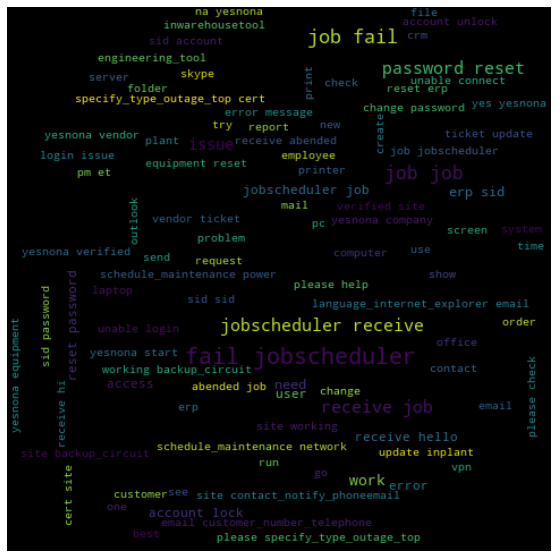

In [372]:
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(wordCloudfinal)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [373]:
new_df = df_ML.copy()
new_df['words'] = data_words_trigrams
new_df.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish,words
0,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,en,login issue verify user detailsemployee manage...,"[login, issue, verify, user, detailsemployee_m..."
1,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings...,en,outlook receive hello team meetingsskype meeti...,"[outlook, receive, hello, team, meetingsskype,..."
2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot...,en,can not log vpn receive hi can not log vpn best,"[can, not, log, vpn, receive, hi, can, not, lo..."
3,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,en,unable access hrtool page unable access hrtool...,"[unable, access, hrtool, page, unable, access,..."
4,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,Skype Error Skype Error,"[skype, error, skype, error]"


In [374]:
sortedListOfGroup = df_ML['Assignment group'].value_counts().sort_values(ascending=False).index
sortedListOfGroup

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_4', 'GRP_29', 'GRP_18', 'GRP_16', 'GRP_31', 'GRP_17',
       'GRP_7', 'GRP_34', 'GRP_26', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_30',
       'GRP_15', 'GRP_42', 'GRP_20', 'GRP_45', 'GRP_22', 'GRP_1', 'GRP_11',
       'GRP_21', 'GRP_47', 'GRP_23', 'GRP_62', 'GRP_48', 'GRP_39', 'GRP_27',
       'GRP_60', 'GRP_37', 'GRP_36', 'GRP_44', 'GRP_50', 'GRP_65', 'GRP_53',
       'GRP_52', 'GRP_51', 'GRP_55', 'GRP_49', 'GRP_46', 'GRP_59', 'GRP_43',
       'GRP_32', 'GRP_66', 'GRP_68', 'GRP_63', 'GRP_38', 'GRP_58', 'GRP_56',
       'GRP_57', 'GRP_54', 'GRP_69', 'GRP_71', 'GRP_72', 'GRP_61', 'GRP_64',
       'GRP_67', 'GRP_35', 'GRP_70', 'GRP_73'],
      dtype='object')

In [375]:
def wordcloud_grp(f, x):
    wordclouds_0=' '.join(map(str, f))

    wc = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10, max_words=50).generate(wordclouds_0.replace('\'',''))
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(x))
    plt.margins(x=0, y=0)
    plt.show()

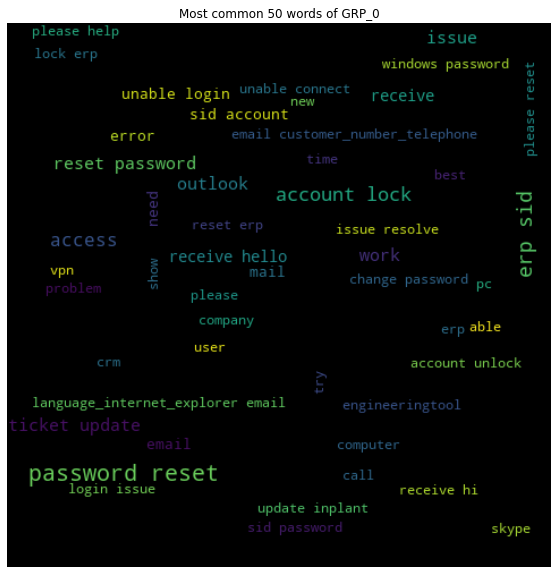

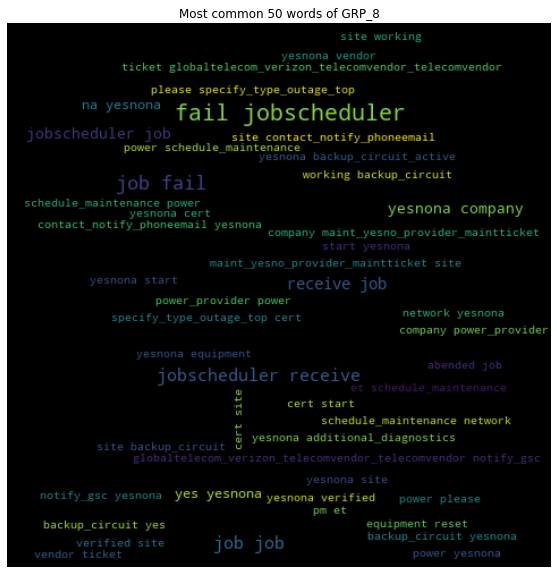

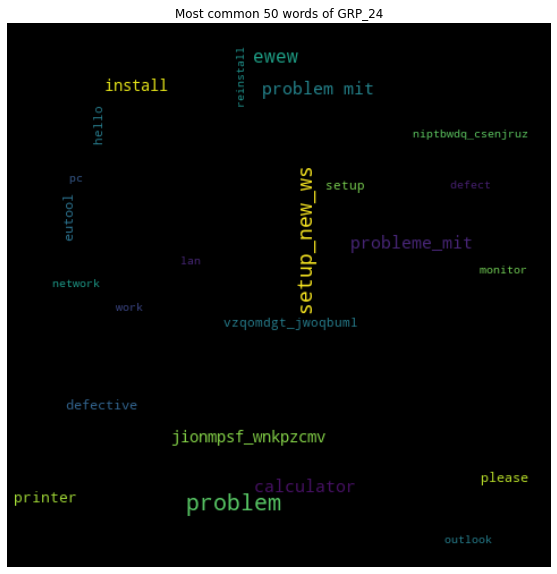

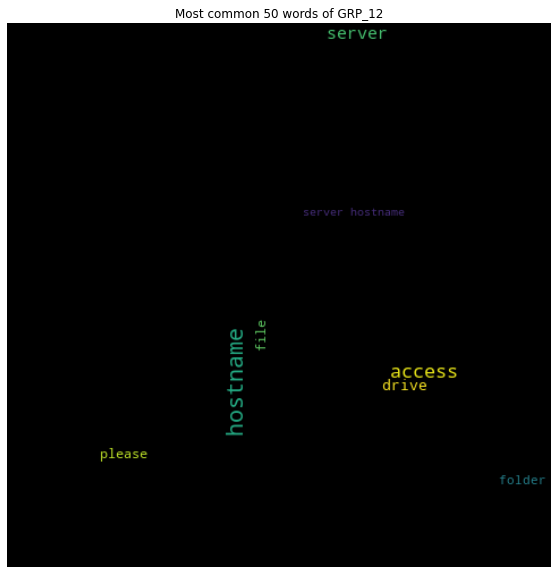

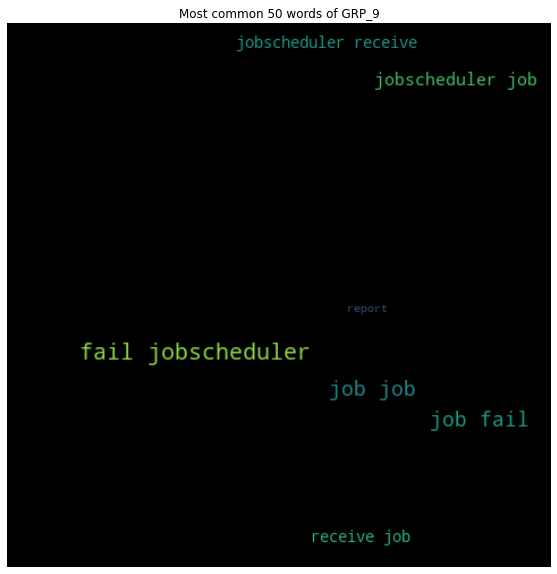

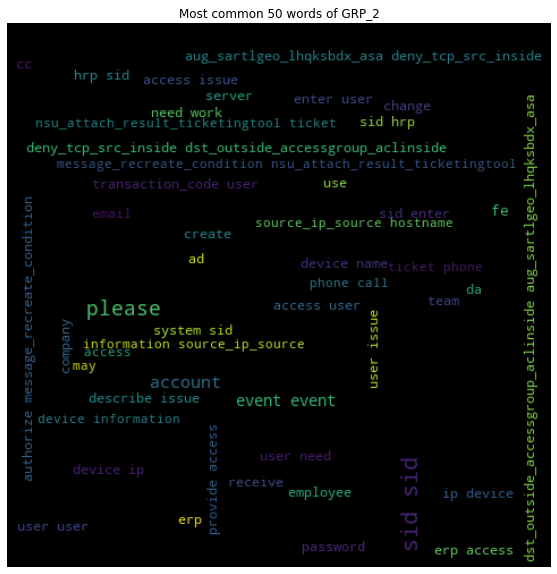

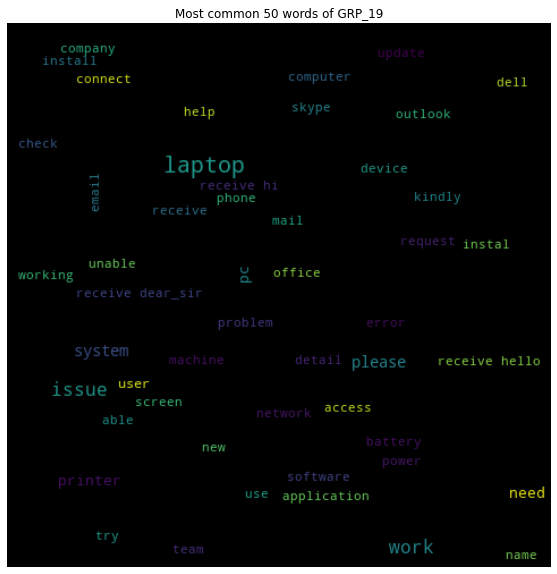

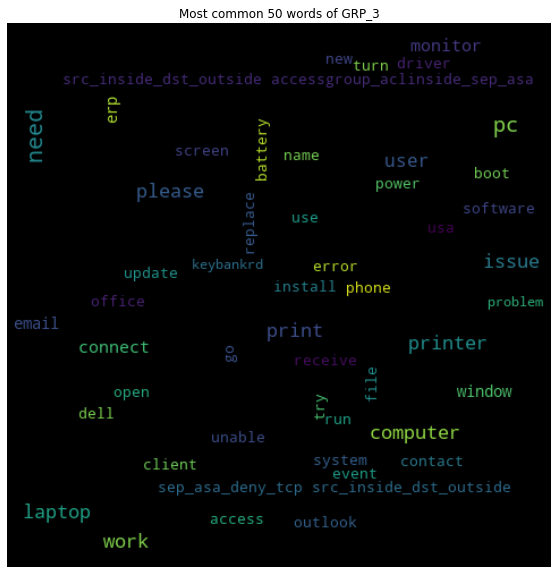

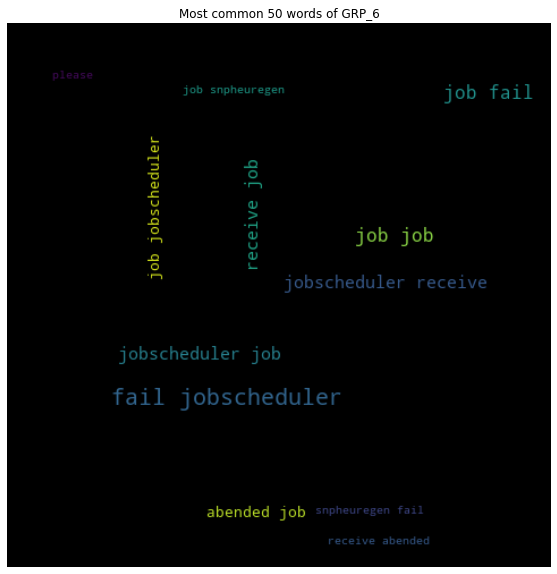

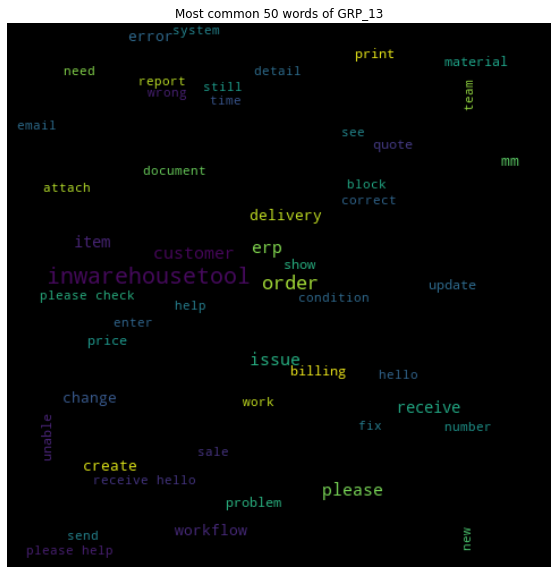

In [376]:
for i in range(10):

    Grp = new_df[new_df ['Assignment group'] == sortedListOfGroup[i]]
    Grp = Grp['words']
    wordcloud_grp(Grp,sortedListOfGroup[i])

In [377]:
df_ML.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish
0,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,en,login issue verify user detailsemployee manage...
1,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings...,en,outlook receive hello team meetingsskype meeti...
2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot...,en,can not log vpn receive hi can not log vpn best
3,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,en,unable access hrtool page unable access hrtool...
4,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,Skype Error Skype Error


Applying Deterministic Rules

In [378]:
df_ML.columns

Index(['Caller', 'Assignment group', 'combined_description', 'Language',
       'ConvertedToEnglish'],
      dtype='object')

In [379]:
df_ML.insert(loc=5,column='pred_group',value=np.nan,allow_duplicates=True)

In [380]:
df_DL.insert(loc=5,column='pred_group',value=np.nan,allow_duplicates=True)

In [381]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Caller                8417 non-null   object 
 1   Assignment group      8417 non-null   object 
 2   combined_description  8417 non-null   object 
 3   Language              8417 non-null   object 
 4   ConvertedToEnglish    8417 non-null   object 
 5   pred_group            0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 394.7+ KB


In [382]:
def deterministicRules(df,columnName):
  for i in range(df.shape[0]):
      #1 Contains telephony_software > GRP_7
    if pd.notna(df[columnName][i]):
      if ('telephonysoftware' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_7'
      #2 contains cutview >  GRP_66
      elif ('cutview' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_66'
      #3 contains engg application >  GRP_58
      elif ('engg application' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_58'
      #4 contains ethics >  GRP_23
      elif ('ethics' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_23'
      # contains crm dynamics >  GRP_22
      elif ('crm dynamics' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_22'
      # contains distributor tool & company center >  GRP_21
      elif ('distributor tool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_21'
      elif ('company center' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_21'
      # contains bpctwhsn kzqsbmtp & network outage or circuit outage >  GRP_8
      elif (df['Caller'][i] == 'bpctwhsn kzqsbmtp' and ('network outage' in df[columnName][i] or 'circuit outage' in df[columnName][i])):
        df['pred_group'][i] = 'GRP_8'
      elif ('reset passwords' in df[columnName][i] and 'the' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_17'
      elif (df[columnName][i].startswith('erp access issue')):
        df['pred_group'][i] = 'GRP_2'
      elif ('vsphere' in df[columnName][i] or 'esxi' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_12'
      elif ('windows account' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('erp sid account lock' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('erp sid password reset' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif(df['Caller'][i] == 'jionmpsf wnkpzcmv' and 'eutool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_24'
      elif(df['Caller'][i] == 'cwrikael oanmsecr' and 'eutool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('sso portal' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_73'
      elif ('unable complete forecast' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_67'
      elif (df[columnName][i].startswith('timecard') or df[columnName][i].startswith('time card')):
        df['pred_group'][i] = 'GRP_36'

In [383]:
deterministicRules(df_ML,'ConvertedToEnglish')

In [384]:
df_ML.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish,pred_group
0,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,en,login issue verify user detailsemployee manage...,NaN
1,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings...,en,outlook receive hello team meetingsskype meeti...,NaN
2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot...,en,can not log vpn receive hi can not log vpn best,NaN
3,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,en,unable access hrtool page unable access hrtool...,NaN
4,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,Skype Error Skype Error,NaN


In [385]:
df_ML.shape

(8417, 6)

In [386]:
deterministicRules(df_DL,'ConvertedToEnglish')

In [387]:
df_DL.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish,pred_group
0,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,en,login issue verified user detailsemployee mana...,NaN
1,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings...,en,outlook received from hello team my meetingssk...,NaN
2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot...,en,cant log in to vpn received from hi i cannot l...,NaN
3,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,en,unable to access hrtool page unable to access ...,NaN
4,owlgqjme qhcozdfx,GRP_0,skype error skype error,no,Skype Error Skype Error,NaN


In [388]:
df_DL.shape

(8417, 6)

In [389]:
df_determinted_ML = df_ML[~df_ML['pred_group'].isna()]

In [390]:
df_determinted_DL = df_DL[~df_DL['pred_group'].isna()]

In [391]:
df_determinted_ML.shape, df_determinted_DL.shape

((301, 6), (407, 6))

In [392]:
df_determinted_ML.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish,pred_group
18,nqdyowsm yqerwtna,GRP_0,erp sid account locked erp sid account locked,en,erp sid account lock erp sid account lock,GRP_0
49,aofnvyzt eqiyskhm,GRP_7,status does not change on telephonysoftware wh...,en,status change telephonysoftware closing call a...,GRP_7
80,ilvortuq zfgrlewm,GRP_0,erp sid account locked erp sid account locked,en,erp sid account lock erp sid account lock,GRP_0
154,hckvpary emxbpkwy,GRP_17,reset passwords for hckvpary emxbpkwy using pa...,en,reset passwords hckvpary emxbpkwy use password...,GRP_17
162,kcipjago mlkptgvb,GRP_0,windows account lockout windows account lockout,en,windows account lockout windows account lockout,GRP_0


In [393]:
df_determinted_DL.head()

,Caller,Assignment group,combined_description,Language,ConvertedToEnglish,pred_group
18,nqdyowsm yqerwtna,GRP_0,erp sid account locked erp sid account locked,en,erp sid account locked erp sid account locked,GRP_0
49,aofnvyzt eqiyskhm,GRP_7,status does not change on telephonysoftware wh...,en,status does not change on telephonysoftware wh...,GRP_7
80,ilvortuq zfgrlewm,GRP_0,erp sid account locked erp sid account locked,en,erp sid account locked erp sid account locked,GRP_0
154,hckvpary emxbpkwy,GRP_17,reset passwords for hckvpary emxbpkwy using pa...,en,reset passwords for hckvpary emxbpkwy using pa...,GRP_17
162,kcipjago mlkptgvb,GRP_0,windows account lockout windows account lockout,en,windows account lockout windows account lockout,GRP_0


In [394]:
df_determinted_ML['pred_group'].value_counts()

GRP_0     125
GRP_7      83
GRP_2      27
GRP_21     21
GRP_22     15
GRP_66      7
GRP_23      6
GRP_12      4
GRP_36      4
GRP_24      3
GRP_17      2
GRP_58      2
GRP_67      1
GRP_73      1
Name: pred_group, dtype: int64

In [395]:
#df_ML.to_csv("df_ML")
df_DL.to_csv("df_DL")

Class Imbalance > 

In [396]:
# Load the dataset into a Pandas dataframe
#dataset2 = pd.read_csv('sample_data/df_ML.csv', )
#dataset2.head()
dataset2_ML = df_ML[df_ML['pred_group'].isna()]
dataset2_DL = df_DL[df_DL['pred_group'].isna()]

In [397]:
dataset2_ML.shape, dataset2_DL.shape


((8116, 6), (8010, 6))

In [398]:
dataset2_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8116 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Caller                8116 non-null   object
 1   Assignment group      8116 non-null   object
 2   combined_description  8116 non-null   object
 3   Language              8116 non-null   object
 4   ConvertedToEnglish    8116 non-null   object
 5   pred_group            0 non-null      object
dtypes: object(6)
memory usage: 443.8+ KB


In [399]:
dataset2_DL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8010 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Caller                8010 non-null   object
 1   Assignment group      8010 non-null   object
 2   combined_description  8010 non-null   object
 3   Language              8010 non-null   object
 4   ConvertedToEnglish    8010 non-null   object
 5   pred_group            0 non-null      object
dtypes: object(6)
memory usage: 438.0+ KB


In [400]:
dataset2_ML = dataset2_ML.reset_index()

In [401]:
dataset2_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8116 entries, 0 to 8115
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 8116 non-null   int64 
 1   Caller                8116 non-null   object
 2   Assignment group      8116 non-null   object
 3   combined_description  8116 non-null   object
 4   Language              8116 non-null   object
 5   ConvertedToEnglish    8116 non-null   object
 6   pred_group            0 non-null      object
dtypes: int64(1), object(6)
memory usage: 444.0+ KB


In [402]:
dataset2_DL = dataset2_DL.reset_index()

In [403]:
dataset2_DL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 8010 non-null   int64 
 1   Caller                8010 non-null   object
 2   Assignment group      8010 non-null   object
 3   combined_description  8010 non-null   object
 4   Language              8010 non-null   object
 5   ConvertedToEnglish    8010 non-null   object
 6   pred_group            0 non-null      object
dtypes: int64(1), object(6)
memory usage: 438.2+ KB


In [404]:
# Create a column for target (assignment group) variable
dataset2_ML['group'] = dataset2_ML['Assignment group'].str[4:]
#from sklearn. preprocessing import LabelEncoder
#le = LabelEncoder()
#dataset2['group'] = le. fit_transform(dataset2['group'])
dataset2_ML['group'] = dataset2_ML['group'].astype('int8')
dataset2_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8116 entries, 0 to 8115
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 8116 non-null   int64 
 1   Caller                8116 non-null   object
 2   Assignment group      8116 non-null   object
 3   combined_description  8116 non-null   object
 4   Language              8116 non-null   object
 5   ConvertedToEnglish    8116 non-null   object
 6   pred_group            0 non-null      object
 7   group                 8116 non-null   int8  
dtypes: int64(1), int8(1), object(6)
memory usage: 451.9+ KB


In [405]:
dataset2_ML.tail()

,index,Caller,Assignment group,combined_description,Language,ConvertedToEnglish,pred_group,group
8111,8411,cpmaidhj elbaqmtp,GRP_3,tablet needs reimaged due to multiple issues w...,en,tablet need reimage due multiple issue crm wif...,NaN,3
8112,8412,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail received fro...,en,email come zz mail receive good afternoon rece...,NaN,29
8113,8414,oybwdsgx oxyhwrfz,GRP_0,vip windows password reset for tifpdchb pedxru...,en,vip windows password reset tifpdchb pedxruyf v...,NaN,0
8114,8415,ufawcgob aowhxjky,GRP_62,machine nÃ£o estÃ¡ funcionando i am unable to ...,en,machine nÃ£o estÃ ¡ funcionando unable access ...,NaN,62
8115,8416,kqvbrspl jyzoklfx,GRP_49,an mehreren pcs lassen sich verschiedene prgra...,de,several pc open various prgramdntyms several p...,NaN,49


In [406]:
# Create a column for target (assignment group) variable
dataset2_DL['group'] = dataset2_DL['Assignment group'].str[4:]
#from sklearn. preprocessing import LabelEncoder
#le = LabelEncoder()
#dataset2['group'] = le. fit_transform(dataset2['group'])
dataset2_DL['group'] = dataset2_DL['group'].astype('int8')
dataset2_DL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 8010 non-null   int64 
 1   Caller                8010 non-null   object
 2   Assignment group      8010 non-null   object
 3   combined_description  8010 non-null   object
 4   Language              8010 non-null   object
 5   ConvertedToEnglish    8010 non-null   object
 6   pred_group            0 non-null      object
 7   group                 8010 non-null   int8  
dtypes: int64(1), int8(1), object(6)
memory usage: 446.0+ KB


In [407]:
dataset2_DL.tail()

,index,Caller,Assignment group,combined_description,Language,ConvertedToEnglish,pred_group,group
8005,8411,cpmaidhj elbaqmtp,GRP_3,tablet needs reimaged due to multiple issues w...,en,tablet needs reimaged due to multiple issues w...,NaN,3
8006,8412,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail received fro...,en,emails not coming in from zz mail received fro...,NaN,29
8007,8414,oybwdsgx oxyhwrfz,GRP_0,vip windows password reset for tifpdchb pedxru...,en,vip windows password reset for tifpdchb pedxru...,NaN,0
8008,8415,ufawcgob aowhxjky,GRP_62,machine nÃ£o estÃ¡ funcionando i am unable to ...,en,machine nÃ£o estÃ¡ funcionando i am unable to ...,NaN,62
8009,8416,kqvbrspl jyzoklfx,GRP_49,an mehreren pcs lassen sich verschiedene prgra...,de,Several PCs can not open various prgramdntyms ...,NaN,49


In [408]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(dataset2_ML.ConvertedToEnglish, 
                                                    dataset2_ML.group, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, y_train.shape)
print('\033[1mShape of the test set:\033[0m', X_test.shape, y_test.shape)

Shape of the training set: (6492,) (6492,)
Shape of the test set: (1624,) (1624,)


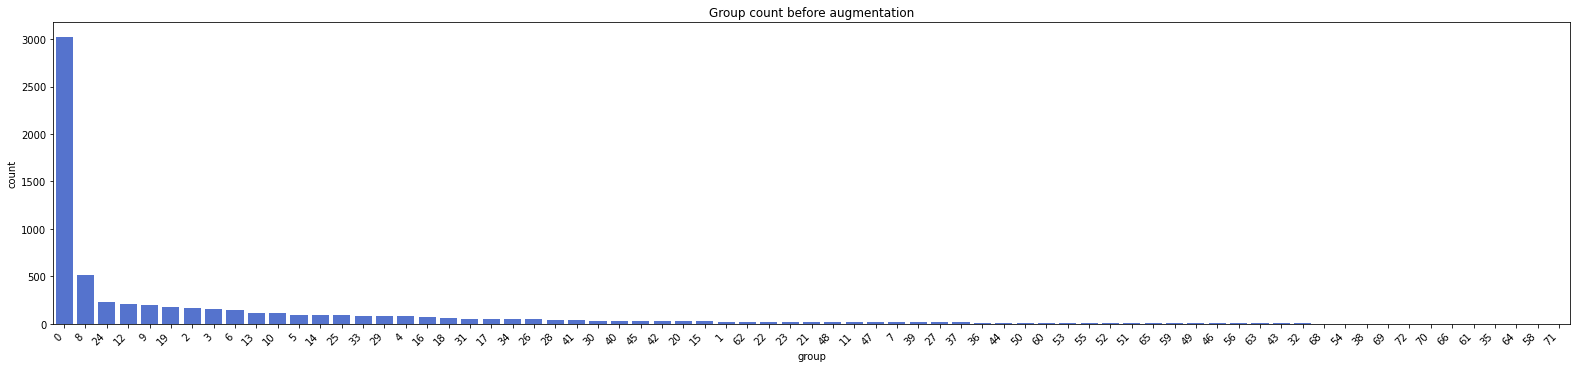

In [409]:
#Create Dataset 
y_train_df_old = pd.DataFrame(y_train,columns=['group'])
#y_train_df_old_nogrp0 = dataset1[dataset1['Assignment group'] != 'GRP_0']

descending_order = y_train_df_old['group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='group', data=y_train_df_old, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.title('Group count before augmentation')
plt.show()

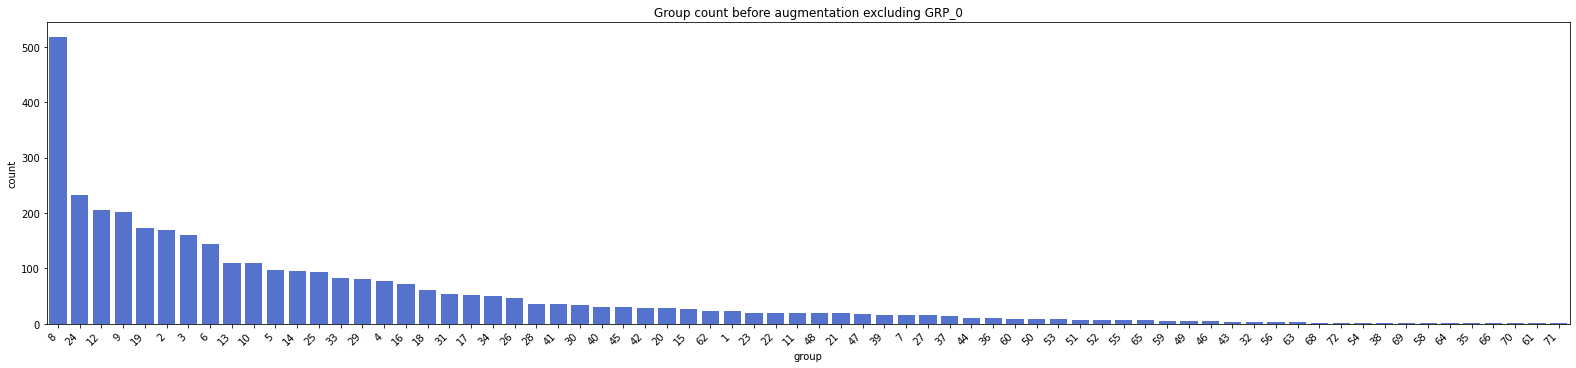

In [410]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
#y_train_df_old = pd. DataFrame(y_train,columns=['group'])
y_train_df_old_nogrp0 = y_train_df_old[y_train_df_old['group'] != 0]

descending_order = y_train_df_old_nogrp0['group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='group', data=y_train_df_old_nogrp0, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.title('Group count before augmentation excluding GRP_0')
plt.show()

In [411]:
#import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [412]:
aug = naw.SynonymAug(aug_src='wordnet',aug_max=3)

In [413]:
# Take an example for augmentation
example=aug.augment(X_train[5],n=2)
print('\033[1mOriginal text:\033[0m')
print(X_train[5])
print('_'*100)
print('\033[1mAugmented text:\033[0m')
print(example[0])
print(example[1])

Original text:
unable log engineering tool skype unable log engineering tool skype
____________________________________________________________________________________________________
Augmented text:
unable log engineering tool skype ineffectual log engineering tool skype
unable logarithm engineering tool skype unable log engineering tool skype


In [414]:
augmented_sentences=[]
augmented_sentences_labels=[]
for i in X_train.index:
  if y_train[i] in (24,9,12,2,19,3,6):
    temps=aug.augment(X_train[i],n=3)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] in (13,10,5,25,14,4,29,33,16,18,31,7,17,26,34):    
    temps=aug.augment(X_train[i],n=6)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] in (72,57,54,66,69,73,35,64,70,71):    
    temps=aug.augment(X_train[i],n=50)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] not in (0,8,24,9,12,2,19,3,6,13,10,5,25,14,4,29,33,16,18,31,7,17,26,34,72,57,54,66,69,73,35,64,70,71):    
    temps=aug.augment(X_train[i],n=12)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])

In [415]:
X_train=X_train.append(pd.Series(augmented_sentences),ignore_index=True)
y_train=y_train.append(pd.Series(augmented_sentences_labels),ignore_index=True)

print(X_train.shape)
print(y_train.shape)

(24175,)
(24175,)


In [416]:
y_train_df = pd. DataFrame(y_train,columns=['group'])

In [417]:
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24175 entries, 0 to 24174
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   group   24175 non-null  int8 
dtypes: int8(1)
memory usage: 23.7 KB


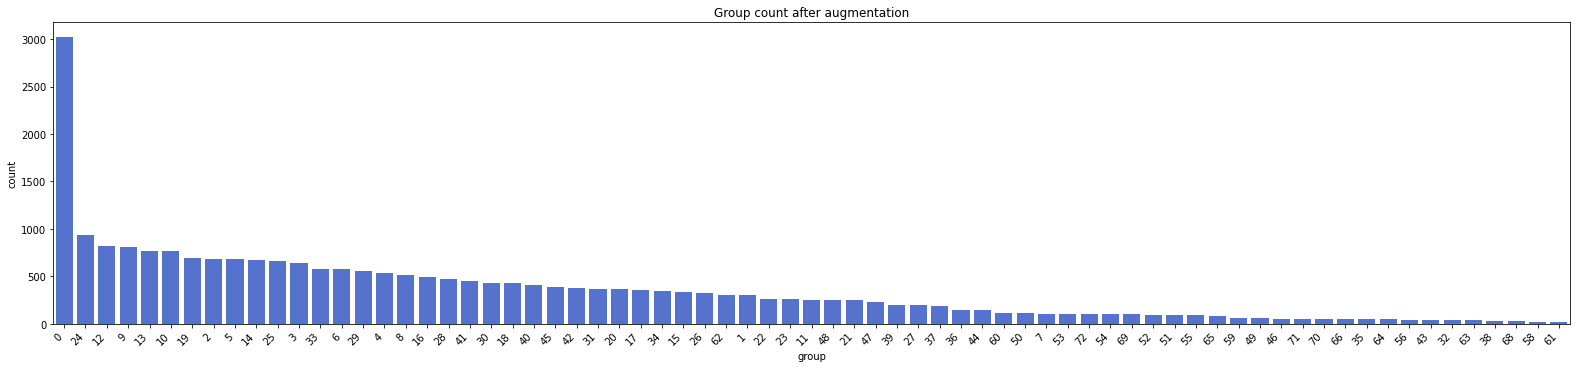

In [418]:
#Create Dataset 
#y_train_df_old_nogrp0 = dataset1[dataset1['Assignment group'] != 'GRP_0']

descending_order = y_train_df['group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='group', data=y_train_df, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.title('Group count after augmentation')
plt.show()

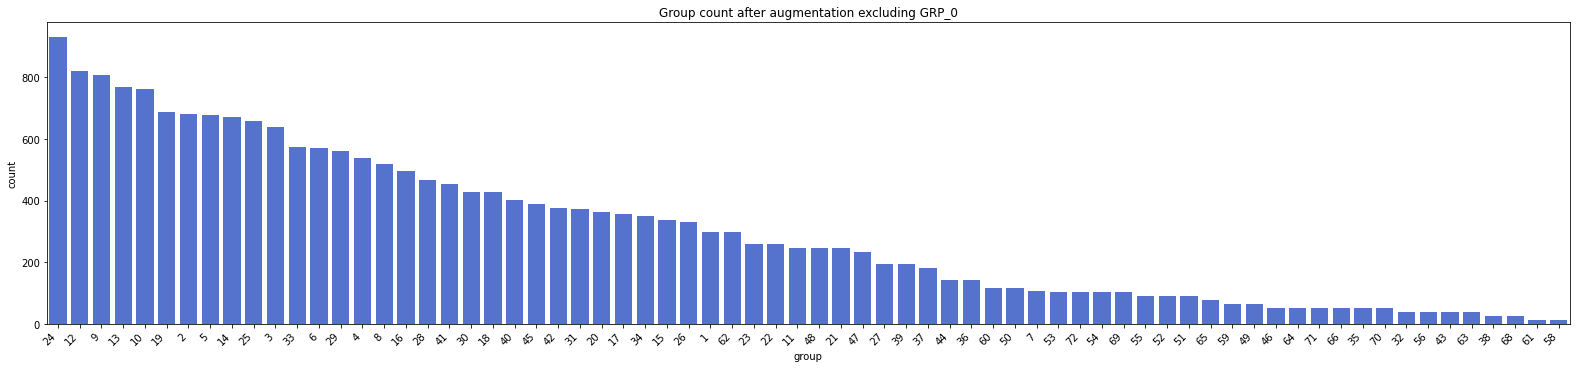

In [419]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
#y_train_df_old = pd. DataFrame(y_train,columns=['group'])
y_train_df_nogrp0 = y_train_df[y_train_df['group'] != 0]

descending_order = y_train_df_nogrp0['group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='group', data=y_train_df_nogrp0, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.title('Group count after augmentation excluding GRP_0')
plt.show()

In [420]:
y_train_df.groupby(['group']).size()

group
0     3025
1      299
2      680
3      640
4      539
5      679
6      572
7      105
8      518
9      808
10     763
11     247
12     820
13     770
14     672
15     338
16     497
17     357
18     427
19     688
20     364
21     247
22     260
23     260
24     932
25     658
26     329
27     195
28     468
29     560
30     429
31     371
32      39
33     574
34     350
35      51
36     143
37     182
38      26
39     195
40     403
41     455
42     377
43      39
44     143
45     390
46      52
47     234
48     247
49      65
50     117
51      91
52      91
53     104
54     102
55      91
56      39
58      13
59      65
60     117
61      13
62     299
63      39
64      51
65      78
66      51
68      26
69     102
70      51
71      51
72     102
dtype: int64

**MACHINE LEARNING MODELS**

5 Machine learning models tested: **bold text**

Random Forests
XGBoost
SVC
k-NN
Naïve Bayes were selected. 


All models help in classification problems. Hence, the selection


**Random Forests**

Random forests or random decision forests are an ensemble learning method for classification, also used in regression. Algorithm creates multiple of decision trees at training time and output of the class is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Randomforest.png

**Advantages:**

1. It reduces overfitting in decision trees and helps to improve the accuracy
2. It is flexible to both classification and regression problems
3. It works well with both categorical and continuous values
4. It automates missing values present in the data
5. Normalising of data is not required as it uses a rule-based approach.

**Disadvantages:**

1. It requires much computational power as well as resources as it builds numerous trees to combine their outputs.
2. It also requires much time for training as it combines a lot of decision trees to determine the class.
3. Due to the ensemble of decision trees, it also suffers interpretability and fails to determine the significance of each variable.


**XGBoost**

XGBoost stands for eXtreme Gradient Boosting. Boosting is an ensemble learning technique to build a strong classifier from several weak classifiers in series. Boosting algorithms play a crucial role in dealing with bias-variance trade-off.

XGBoost is an ensemble learning algorithm meaning that it combines the results of many models, called base learners to make a prediction. Like Random Forests, XGBoost uses Decision Trees as base learners. Individual decision trees are low-bias, high-variance models. They are incredibly good at finding the relationships in any type of training data but struggle to generalize well on unseen data.

XGBOost.png

**XGBoost Features**

1. Regularized Learning: Regularization term helps to smooth the final learnt weights to avoid over-fitting. The regularized objective will tend to select a model employing simple and predictive functions.

2. Gradient Tree Boosting: The tree ensemble model cannot be optimized using traditional optimization methods in Euclidean space. Instead, the model is trained in an additive manner.

3. Shrinkage and Column Subsampling: Besides the regularized objective, two additional techniques are used to further prevent overfitting. a) The first technique is shrinkage introduced by Friedman. Shrinkage scales newly added weights by a factor η after each step of tree boosting. Shrinkage reduces the influence of each tree and leaves space for future trees to improve the model.

b) The second technique is the column (feature) subsampling. This technique is used in Random Forest. Column sub-sampling prevents over-fitting even more so than the traditional row sub-sampling. The usage of column sub-samples also speeds up computations of the parallel algorithm.

**Advantages:**

1. Less feature engineering required (No need for scaling, normalizing data, can also handle missing values well)
2. Feature importance can be found out(it output importance of each feature, can be used for feature selection)
3. Fast to interpret
4. Outliers have minimal impact.
5. Handles large sized datasets well.
6. Good Execution speed
7. Good model performance (wins most of the Kaggle competitions)
8. Less prone to overfitting


**Disadvantages:**

1. Difficult interpretation , visualization tough
3. Overfitting possible if parameters not tuned properly.
3. Harder to tune as there are too many hyperparameters.


**Linear SVC**

The Support Vector Machine (SVM) technique is a popular and highly accurate machine learning method for classification problems. SVM try to find an optimal hyperplane within the input space to correctly classify the binary (or multi-class classification problem.

SVC.png

**Advantages:**

1. SVM works relatively well when there is a clear margin of separation between classes.
2. SVM is more effective in high dimensional spaces.
3. SVM is effective in cases where the number of dimensions is greater than the number of samples.
4. SVM is relatively memory efficient
5. Outliers have less impact.


**Disadvantages:**

1. SVM algorithm is not suitable for large data sets.
2. SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.
3. In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.
4. As the support vector classifier works by putting data points, above and below the classifying hyperplane there is no probabilistic explanation for the classification.


**K Nearest Neighbors (k-NN)**

K Nearest Neighbors is a Supervised Learning algorithm and is mostly used for classification and also regression. KNN algorithm is uses distances such as Euclidean, Manhattan and Minkowski to find the K nearest neighbors in the training data and then uses these labels to predict



**Advantages:**

1. Simple to understand and implement
2. No assumption about data (for e.g. in case of linear regression we assume dependent variable and independent variables are linearly related, in Naïve 
3. Bayes we assume features are independent of each other etc., but k-NN makes no assumptions about data)
4. Constantly evolving model: When it is exposed to new data, it changes to accommodate the new data points.
5. Lazy algorithms do not need any training data points for model generation
5. Multi-class problems can also be solved.
6. One Hyper Parameter: K-NN might take some time while selecting the first hyper parameter but after that rest of the parameters are aligned to it.



**Disadvantages:**

1. Slow for large datasets.
2. Curse of dimensionality: Does not work very well on datasets with large number of features.
3. Scaling of data absolute must.
4. Does not work well on Imbalanced data. So before using k-NN either under sample majority class or oversample minority class and have a balanced dataset.
5. Sensitive to outliers.
6. Can’t deal well with missing values


**Naïve Bayes**

A Naive Bayes classifier is an algorithm that uses Bayes’ theorem to classify objects. Naive Bayes classifiers assume strong, or naive, independence between attributes of data points. The key insight of Bayes’ theorem is that the probability of an event can be adjusted as new data is introduced. These classifiers are widely used for machine learning because they are simple to implement.

**Advantages:**

1. Real time predictions: It is very fast and can be used in real time.
2. Scalable with Large datasets
3. Insensitive to irrelevant features.
4. Multi class prediction is effectively done in Naive Bayes
5. Good performance with high dimensional data(no. of features is large)

**Disadvantages:**

1. Independence of features does not hold: The fundamental Naive Bayes assumption is that each feature makes an independent and equal contribution to the outcome. However this condition is not met most of the times.
2. Bad estimator: Probability outputs from predict_proba are not to be taken too seriously. 
3. Training data should represent population well: If you have no occurrences of a class label and a certain attribute value together (e.g. class=”No”, shape=”Overcast “) then the posterior probability will be zero. So if the training data is not representative of the population, Naive bayes does not work well.



In [421]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input
    
    start = time.time()  # note the start time 

    clf = model
    clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('model', model),
                     ])

    clf.fit(X_train, y_train)   # fit the model using the train data

    pred_train=clf.predict(X_train) # model predictions on the training data
    y_pred = clf.predict(X_test)   # model predictions on the test data
    
    accuracy_training = (accuracy_score(y_train,pred_train))*100 #accurancy on training
    accuracy_test= (accuracy_score(y_test,y_pred ))*100  #accuracy on test
    

    recallscore_training =(recall_score(y_train,pred_train,average='weighted'))*100  #recall on training
    recallscore_test = (recall_score(y_test,y_pred, average='weighted'))*100  #recall on test
    
    precision_training = (precision_score(y_train,pred_train, average='weighted'))*100
    precision_test = (precision_score(y_test,y_pred,average='weighted'))*100
    
    f1score_training = (f1_score(y_train,pred_train, average='weighted'))*100
    f1score_test = (f1_score(y_test,y_pred, average='weighted'))*100
        
    end = time.time()  #note the end time
       
    duration = end - start  # calculate the total duration

    print('Algorithm:', type(model).__name__)
    print("\n Classification report:\n", classification_report(y_test, y_pred))
    print("\n Confusion report:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print()
    print("\n \n")
     
    

    return  accuracy_training,accuracy_test,recallscore_training, recallscore_test, precision_training,precision_test,f1score_training, f1score_test,  duration, y_pred  # return all the metrics along with predictions





In [422]:
import time

In [423]:
rf  = RandomForestClassifier()
xgb = XGBClassifier()
SVC = LinearSVC()
KNN = KNeighborsClassifier()
NB = MultinomialNB()

result = {}   # Create an empty dictionary to later use to store metrics of each of the models

for model, name  in zip([rf,xgb, SVC,KNN,NB], 
                         ['Random Forest', 'Xgboost', 'SVC','KNN','Naive Bayes']):
    result[name] = fit_n_print(model,X_train, X_test, y_train, y_test)

Algorithm: RandomForestClassifier

 Classification report:
               precision    recall  f1-score   support

           0       0.72      0.93      0.81       742
           1       0.50      0.25      0.33         8
           2       0.65      0.32      0.43        41
           3       0.44      0.32      0.38        37
           4       0.44      0.30      0.36        23
           5       0.61      0.45      0.52        31
           6       0.74      0.51      0.61        39
           7       0.00      0.00      0.00         6
           8       0.58      0.73      0.65       127
           9       0.30      0.20      0.24        50
          10       0.88      0.47      0.61        30
          11       0.50      0.09      0.15        11
          12       0.48      0.51      0.49        47
          13       0.62      0.62      0.62        34
          14       0.67      0.40      0.50        20
          15       1.00      0.18      0.31        11
          16       0.

In [427]:
result_normal = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['accuracy_training','accuracy_test',
                                 'recallscore_training', 'recallscore_test', 
                                 'precision_training','precision_test',
                                 'f1score_training', 'f1score_test', 
                                 'Elapsed'],
                      index= result.keys())   # use the model names as index

result_normal.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result_normal

,accuracy_training,accuracy_test,recallscore_training,recallscore_test,precision_training,precision_test,f1score_training,f1score_test,Elapsed
Model,,,,,,,,,
Random Forest,95.471349,63.85468,95.471349,63.85468,95.915518,59.095077,95.389985,56.57882,11.705811
Xgboost,76.848429,62.992611,76.848429,62.992611,81.010459,59.955669,74.191057,56.112175,128.290884
SVC,92.883549,68.041872,92.883549,68.041872,93.961577,64.532954,92.617981,64.424221,0.936534
KNN,61.783734,53.3867,61.783734,53.3867,81.253981,62.031422,63.162895,51.433184,2.145335
Naive Bayes,56.608133,54.433498,56.608133,54.433498,40.498043,38.02106,42.68888,39.945616,0.393043


In [425]:
# Create training and test datasets with 80:20 ratio without augmenatation
X_train, X_test, y_train, y_test = train_test_split(dataset2_ML.ConvertedToEnglish, 
                                                    dataset2_ML.group, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, y_train.shape)
print('\033[1mShape of the test set:\033[0m', X_test.shape, y_test.shape)

Shape of the training set: (6492,) (6492,)
Shape of the test set: (1624,) (1624,)


In [426]:
rf  = RandomForestClassifier()
xgb = XGBClassifier()
SVC = LinearSVC()
KNN = KNeighborsClassifier()
NB = MultinomialNB()

result = {}   # Create an empty dictionary to later use to store metrics of each of the models

for model, name  in zip([rf,xgb, SVC,KNN,NB], 
                         ['Random Forest', 'Xgboost', 'SVC','KNN','Naive Bayes']):
    result[name] = fit_n_print(model,X_train, X_test, y_train, y_test)

Algorithm: RandomForestClassifier

 Classification report:
               precision    recall  f1-score   support

           0       0.65      0.98      0.78       742
           1       0.00      0.00      0.00         8
           2       0.65      0.27      0.38        41
           3       0.60      0.16      0.26        37
           4       1.00      0.22      0.36        23
           5       0.86      0.39      0.53        31
           6       0.62      0.41      0.49        39
           7       0.00      0.00      0.00         6
           8       0.57      0.85      0.68       127
           9       0.32      0.16      0.21        50
          10       0.85      0.37      0.51        30
          11       0.00      0.00      0.00        11
          12       0.53      0.38      0.44        47
          13       0.71      0.44      0.55        34
          14       0.57      0.20      0.30        20
          15       0.00      0.00      0.00        11
          16       0.

In [428]:
result_normal = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['accuracy_training','accuracy_test',
                                 'recallscore_training', 'recallscore_test', 
                                 'precision_training','precision_test',
                                 'f1score_training', 'f1score_test', 
                                 'Elapsed'],
                      index= result.keys())   # use the model names as index

result_normal.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result_normal

,accuracy_training,accuracy_test,recallscore_training,recallscore_test,precision_training,precision_test,f1score_training,f1score_test,Elapsed
Model,,,,,,,,,
Random Forest,95.471349,63.85468,95.471349,63.85468,95.915518,59.095077,95.389985,56.57882,11.705811
Xgboost,76.848429,62.992611,76.848429,62.992611,81.010459,59.955669,74.191057,56.112175,128.290884
SVC,92.883549,68.041872,92.883549,68.041872,93.961577,64.532954,92.617981,64.424221,0.936534
KNN,61.783734,53.3867,61.783734,53.3867,81.253981,62.031422,63.162895,51.433184,2.145335
Naive Bayes,56.608133,54.433498,56.608133,54.433498,40.498043,38.02106,42.68888,39.945616,0.393043


**1. There is a problem overfiiting as can be oberved from the above result.**

**2. We are working to identify the reason for the same.**

**3. These are first cut of the models and not the final result.**

**DEEP LEARNING**

In [429]:
# Create a column for target (assignment group) variable
dataset2_DL['group'] = dataset2_DL['Assignment group'].str[4:]
#from sklearn. preprocessing import LabelEncoder
#le = LabelEncoder()
#dataset2['group'] = le. fit_transform(dataset2['group'])
dataset2_DL['group'] = dataset2_DL['group'].astype('int8')
dataset2_DL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 8010 non-null   int64 
 1   Caller                8010 non-null   object
 2   Assignment group      8010 non-null   object
 3   combined_description  8010 non-null   object
 4   Language              8010 non-null   object
 5   ConvertedToEnglish    8010 non-null   object
 6   pred_group            0 non-null      object
 7   group                 8010 non-null   int8  
dtypes: int64(1), int8(1), object(6)
memory usage: 446.0+ KB


In [430]:
dataset2_DL.tail()

,index,Caller,Assignment group,combined_description,Language,ConvertedToEnglish,pred_group,group
8005,8411,cpmaidhj elbaqmtp,GRP_3,tablet needs reimaged due to multiple issues w...,en,tablet needs reimaged due to multiple issues w...,NaN,3
8006,8412,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail received fro...,en,emails not coming in from zz mail received fro...,NaN,29
8007,8414,oybwdsgx oxyhwrfz,GRP_0,vip windows password reset for tifpdchb pedxru...,en,vip windows password reset for tifpdchb pedxru...,NaN,0
8008,8415,ufawcgob aowhxjky,GRP_62,machine nÃ£o estÃ¡ funcionando i am unable to ...,en,machine nÃ£o estÃ¡ funcionando i am unable to ...,NaN,62
8009,8416,kqvbrspl jyzoklfx,GRP_49,an mehreren pcs lassen sich verschiedene prgra...,de,Several PCs can not open various prgramdntyms ...,NaN,49


In [431]:
gloveFileName = '/content/sample_data/glove.6B.200d.txt'

**Implementing Bi LSTM**

Bidirectional recurrent neural networks(RNN) are really just putting two independent RNNs together. This structure allows the networks to have both backward and forward information about the sequence at every time step.

Using bidirectional will run the inputs in two ways, one from past to future and one from future to past and what differs this approach from unidirectional is that in the LSTM that runs backward you preserve information from the future and using the two hidden states combined you are able in any point in time to preserve information from both past and future.

In NLP sometimes to understand a word we need not just to the previous word, but also the next word.





**Advantages:**

It solves the problem of fixed sequence to sequence prediction. Vanilla RNN has a limitation where both input and output have the same size.

**Disadvantages:**

Since BiLSTM has double LSTM cells, it is costly.
Not Good fit for Speech Recognition

In [432]:
# #Tokenizing and Padding the Independent features

from tensorflow.python.keras.preprocessing.sequence import pad_sequences

MAX_LENGTH = 300
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dataset2_DL.ConvertedToEnglish)
post_seq = tokenizer.texts_to_sequences(dataset2_DL.ConvertedToEnglish.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [433]:
#Splitting the data into Train and Test (Ratio = 0.20)
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.2, random_state=42)

In [434]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((6408, 300), (1602, 300), (6408,), (1602,))

In [435]:
#Creating input dimension ('vocab_size')

vocab_size = len(tokenizer.word_index) + 1
max_features = vocab_size 
vocab_size

14811

In [452]:
# # # Creating Output dimension ('num_class')
num_class_all = len(np.unique(dataset2_DL['group'].values))
num_class_all

73

In [444]:
# # # Creating Output dimension ('num_class')
num_class = len(np.unique(y_train.values))
num_class

72

In [443]:
num_class_test = len(np.unique(y_test.values))
num_class_test

60

In [451]:
np.unique(dataset2_DL['group'].values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72], dtype=int8)

In [449]:
np.unique(y_train.values) 
#Group 61 absent

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72], dtype=int8)

In [450]:
np.unique(y_test.values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34,
       36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54,
       55, 56, 57, 60, 61, 62, 65, 68, 72], dtype=int8)

In [ ]:
#32,35,38,49,58,63,64,66,67,69,70,71

In [251]:
max_features = vocab_size  
maxlen = 200
seq_output_size = 128
filters = 64
kernel_size = 5
pool_size = 4
activation_func = 'sigmoid'

In [437]:
from keras import layers
# For Embedding Layer
from keras.layers.embeddings import Embedding


# Bi directional LSTM
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
x = layers.Dropout(0.2)(x)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(num_class, activation='softmax')(x)
# Add a classifier
bilstm_model = keras.Model(inputs, outputs)
bilstm_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_6 (Embedding)     (None, None, 128)         1895808   
                                                                 
 dropout_10 (Dropout)        (None, None, 128)         0         
                                                                 
 bidirectional_10 (Bidirecti  (None, None, 128)        98816     
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 128)              98816     
 onal)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 128)               0   

In [448]:
dataset2_DL['group'].value_counts().sort_values(ascending=True).index

Int64Index([70, 61, 64, 35, 67, 58, 66, 72, 71, 69, 54, 23, 57, 56, 38, 63, 68,
            32, 43, 46, 65, 49, 59, 51, 55, 52, 53, 36, 50, 44, 37, 60, 27, 39,
            17,  7, 21, 62, 48, 22, 47, 11,  1, 45, 20, 15, 42, 30, 41, 40, 28,
            26, 34, 31, 16, 18, 29,  4, 33, 14, 25,  5, 10, 13,  6,  3,  2, 19,
            12,  9, 24,  8,  0],
           dtype='int64')

In [440]:
bilstm_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
bilstm_model.fit(X_train, y_train, batch_size=20, epochs=7, validation_data=(X_test, y_test))

Epoch 1/7
304/321 [===========================>..] - ETA: 12s - loss: 1.5951 - acc: 0.5975

InvalidArgumentError: ignored

In [ ]:
bi_lstm_predicted = bilstm_model.predict(X_test)
bi_lstm_predicted = np.argmax(bi_lstm_predicted, axis=1)
accuracy_score(y_test, bi_lstm_predicted)

0.08614232209737828

**1. We have made first cut of some models. They need lot of refining and tunning.**

**2. We will be going through the steps again to go to the root cause and try different iterations to improve the scores.**
